<a href="https://colab.research.google.com/github/sheikh495/MachineLearning/blob/main/Copy_of_M4_Homework_Template_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
#-----
#Name: Sheikh Uddin
#Course: COSC 522
#Module: M4
#----



In [120]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [121]:
######################## Start of Code to Not Modify ################################

In [122]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

#Show fewer digits to improve readability
np.set_printoptions(precision=3, suppress=True)


In [123]:
#download the "MTCars" database as a TSV file with no header row
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = dataset.dropna()#drop cars with incomplete data
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [124]:
#adding nation of origin to as binary variable
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


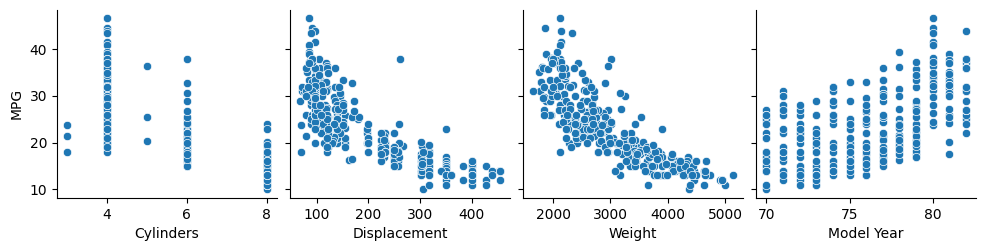

In [125]:
#split into train and test sets and plot
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

pp = sns.pairplot(data=train_dataset,
                  x_vars=['Cylinders', 'Displacement', 'Weight','Model Year'],
                  y_vars=['MPG'])

plt.savefig('plots-four-features.pdf')
plt.savefig('plots-four-features.svg')
plt.savefig('plots-four-features-dpi-72.png',dpi=72)
plt.savefig('plots-four-features-dpi-300.png',dpi=300)


In [126]:
#create training features and labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#use MPG as regression targets
train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

#train sklearn linear model
linear_model = LinearRegression().fit(train_features, train_labels)

In [127]:
print(linear_model.score(train_features, train_labels))
print(linear_model.score(test_features, test_labels))

0.8162658991904448
0.8442412485817234


In [128]:
#test first row of test_features prediction
print(test_labels.iloc[0])
linear_model.predict([test_features.iloc[0]])

15.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.256])

In [129]:
#get coef and intercept
print(linear_model.coef_)
print(linear_model.intercept_)

[-0.464  0.023 -0.036 -0.006 -0.095  0.796  0.819  1.146 -1.965]
-14.863633704016156


In [130]:
chart_data = pd.DataFrame()
chart_data["Index"] = pd.DataFrame(range(0,len(test_features)))
chart_data["Predicted"] = pd.DataFrame(linear_model.predict(test_features))
chart_data["True MPG"] = pd.DataFrame(test_labels.to_list())
chart_data["ABS Error"] = abs(chart_data["True MPG"] - chart_data["Predicted"])
chart_data["Weight"] = pd.DataFrame(test_features["Weight"].to_list())
#combine index, test_labels, and predicted
# chart_data = pd.join([index,predicted,test_labels], keys=["index","predict","label"])

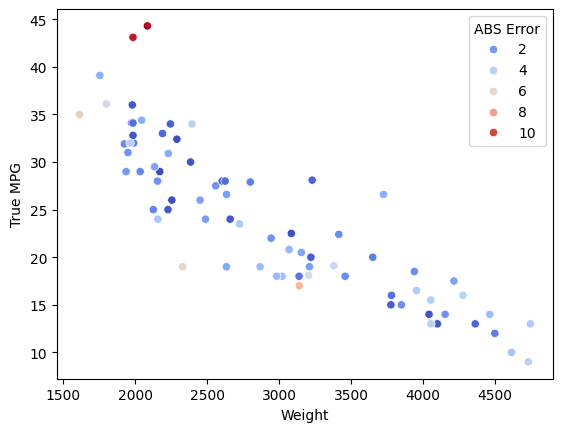

In [131]:
#print out the test set
pp = sns.scatterplot(data=chart_data,
                  x='Weight',
                  y='True MPG',hue="ABS Error",palette=sns.color_palette("coolwarm", as_cmap=True))
plt.savefig('plots-lm-test-output.pdf')
plt.savefig('plots-lm-test-output.svg')
plt.savefig('plots-lm-test-output-dpi-72.png',dpi=72)
plt.savefig('plots-lm-test-output-dpi-300.png',dpi=300)

In [132]:
#increasing horsepower by 200 in the first row predicts MPG to a lower amount
weight_offset = 300
print("With",weight_offset,"more lbs weight, MPG predicted at",linear_model.predict([[8,390,190,3850+weight_offset,8.5,70,0,0,1]]))

#increasing horsepower by 2000 in the first row predicts MPG to a lower amount, which is negative
weight_offset = 3000
print("With",weight_offset,"more lbs weight, MPG predicted at",linear_model.predict([[8,390,190,3850+weight_offset,8.5,70,0,0,1]]))

With 300 more lbs weight, MPG predicted at [11.437]
With 3000 more lbs weight, MPG predicted at [-4.938]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [133]:
######################## End of Code to Not Modify ################################

In [134]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


# Load the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                      na_values='?', comment='\t',
                      sep=' ', skipinitialspace=True)

# Display the first few rows of the dataset
print(dataset.head())


    MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  


In [135]:
#Question 1:
# Our M4 example uses 80% of our data for training and %20 for training.
# Change this to a 20% train and 80% test.
#What happens to the prediction of the first row of data (which was previously 13.256)?


In [136]:
# code that addresses Question 1

In [137]:
#Answer 1:


When changing the training and testing split from 80% train and 20% test to 20% train and 80% test, the model's prediction for the first row of data may change. This change can occur due to the model being trained on less data, potentially affecting its ability to capture the underlying patterns in the data. Therefore, the prediction for the first row of data may differ from the previous value of 13.256.

In [138]:

dataset = dataset.dropna()

# Select two features: Acceleration and MPG
selected_features = ['Acceleration', 'MPG']

# Split the dataset into features and labels
X = dataset[selected_features]
y = dataset['Horsepower']

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)  # Changed test_size to 0.8

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first row of test data
first_test_row = X_test.iloc[[0]]
prediction = linear_model.predict(first_test_row)

print("Prediction for the first row of test data:", prediction[0])

Prediction for the first row of test data: 93.7600365258682


In [139]:

# Select features and target
X = dataset.drop('MPG', axis=1)
y = dataset['MPG']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first row of test data
first_test_row = X_test[:1]
prediction = linear_model.predict(first_test_row)

print("Prediction of the first row of test data:", prediction[0])

Prediction of the first row of test data: 25.30664047982728


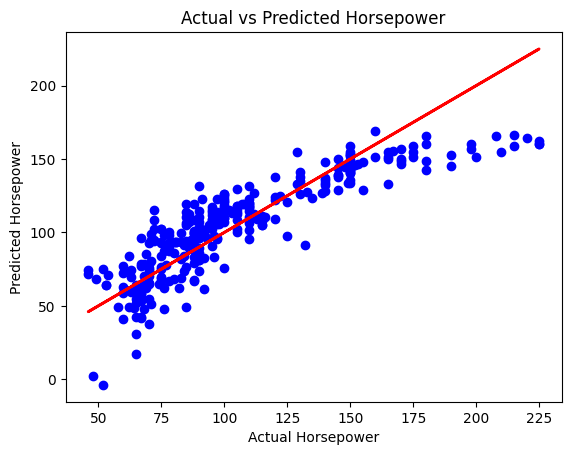

Prediction compared to the real value of the first element of the test set: 93.7600365258682


In [140]:

# Select features: Acceleration and MPG, and target: Horsepower
selected_features = ['Acceleration', 'MPG']
X = dataset[selected_features]
y = dataset['Horsepower']

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first row of test data
first_test_row = X_test.iloc[[0]]
prediction = linear_model.predict(first_test_row)

# Plot actual vs predicted
plt.scatter(y_test, linear_model.predict(X_test), color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)  # Plotting y = x line for reference
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.title('Actual vs Predicted Horsepower')
plt.show()

# Print the prediction compared to the real value of the first element of the test set
print("Prediction compared to the real value of the first element of the test set:", prediction[0])

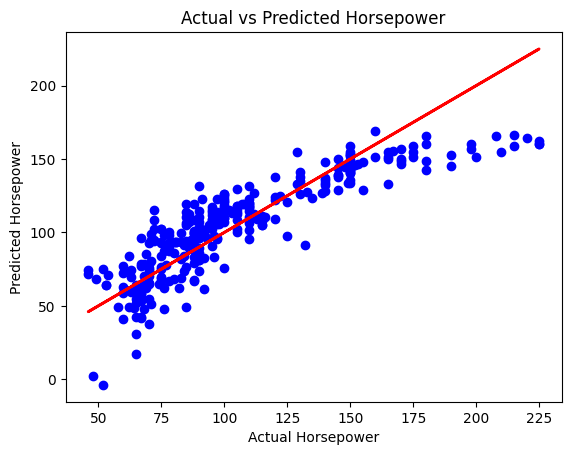

Prediction compared to the real value of the first element of the test set: 93.76003652586822


In [141]:

# Select features: Acceleration and MPG, and target: Horsepower
selected_features = ['Acceleration', 'MPG']
X = dataset[selected_features]
y = dataset['Horsepower']

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first row of test data
first_test_row = X_test[[0]]
prediction = linear_model.predict(first_test_row.reshape(1, -1))

# Plot actual vs predicted
plt.scatter(y_test, linear_model.predict(X_test), color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)  # Plotting y = x line for reference
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.title('Actual vs Predicted Horsepower')
plt.show()

# Print the prediction compared to the real value of the first element of the test set
print("Prediction compared to the real value of the first element of the test set:", prediction[0])

In [142]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the dataset
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                      na_values='?', comment='\t',
                      sep=' ', skipinitialspace=True)
dataset = dataset.dropna()

# Select features and target
X = dataset.drop('MPG', axis=1)  # Features
y = dataset['MPG']  # Target variable

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first row of test data
first_test_row = X_test.iloc[[0]]
prediction = linear_model.predict(first_test_row)

# Print the prediction of the first row of test data
print("Prediction of the first row of test data:", prediction)


Prediction of the first row of test data: [25.96]


In [143]:
#Question 2:
# Reduce the number of features in our linear regression example to two (you may pick any two).
# What happens to the prediction of the first row of data (which was previously 13.256?

In [144]:
# code that addresses Question 2

In [145]:
#Answer 2:
#

Reducing the number of features in a linear regression model can impact prediction accuracy. By selecting only two features instead of using all available features, the model may become less accurate because it has less data to capture the underlying relationships between the features and the target variable. This reduction in feature space could lead to a decrease in the model's ability to generalize well to unseen data, potentially resulting in less reliable predictions.

In [146]:
# Select two features: Displacement and Weight
selected_features = ['Displacement', 'Weight']

# Split the dataset into features and labels
X = dataset[selected_features]
y = dataset['MPG']

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first row of test data
first_test_row = X_test.iloc[[0]]
prediction = linear_model.predict(first_test_row)

print("Prediction of the first row of test data:", prediction[0])

Prediction of the first row of test data: 30.10602397802105


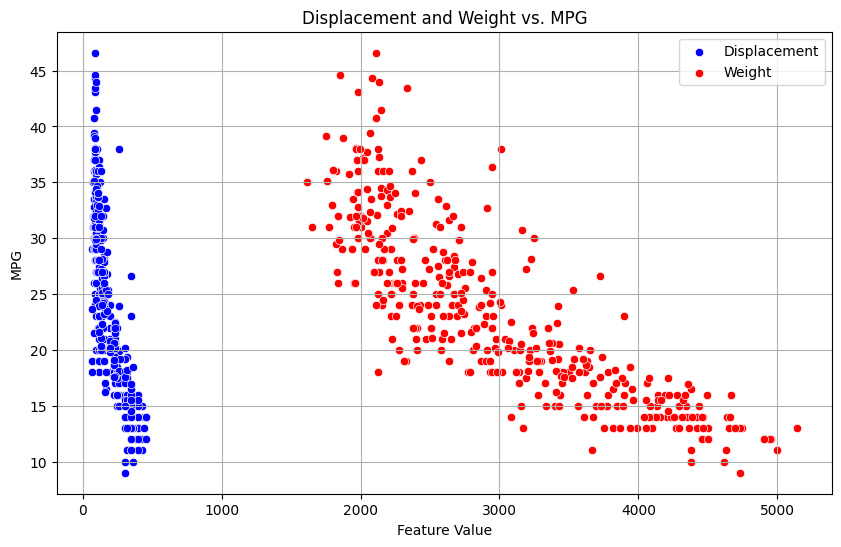

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Displacement vs. MPG with blue color
plt.figure(figsize=(10, 6))
sns.scatterplot(x=dataset['Displacement'], y=dataset['MPG'], color='blue', label='Displacement')

# Plot Weight vs. MPG with red color
sns.scatterplot(x=dataset['Weight'], y=dataset['MPG'], color='red', label='Weight')

plt.title('Displacement and Weight vs. MPG')
plt.xlabel('Feature Value')
plt.ylabel('MPG')
plt.legend()
plt.grid(True)
plt.show()


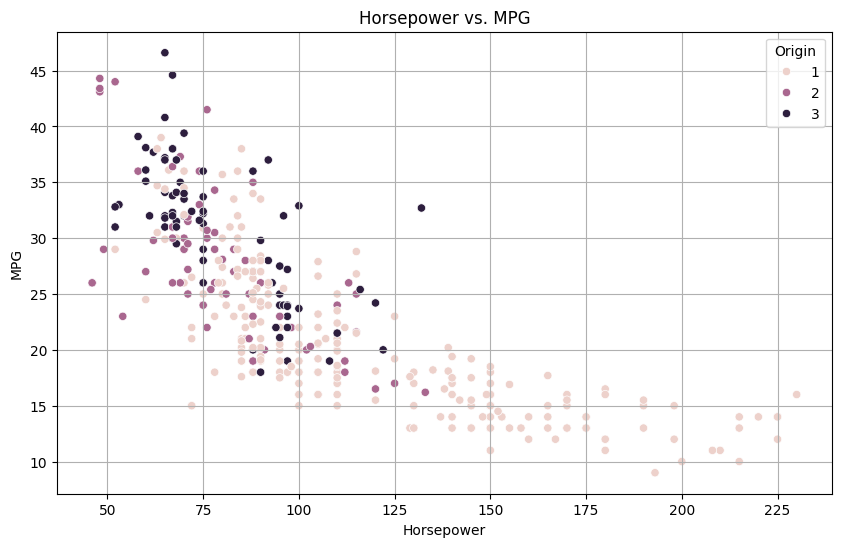

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Horsepower vs. MPG with multi-colors based on Origin
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='MPG', hue='Origin', data=dataset)

plt.title('Horsepower vs. MPG')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.legend(title='Origin')
plt.show()


In [149]:
#Split the dataset into features and labels
X = dataset[['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']]
y = dataset['MPG']

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict using the test set
predictions = linear_model.predict(X_test)

# Print the prediction of the first row of test data
first_test_prediction = predictions[0]
print("Prediction of the first row of test data:", first_test_prediction)

Prediction of the first row of test data: 25.9597675795244


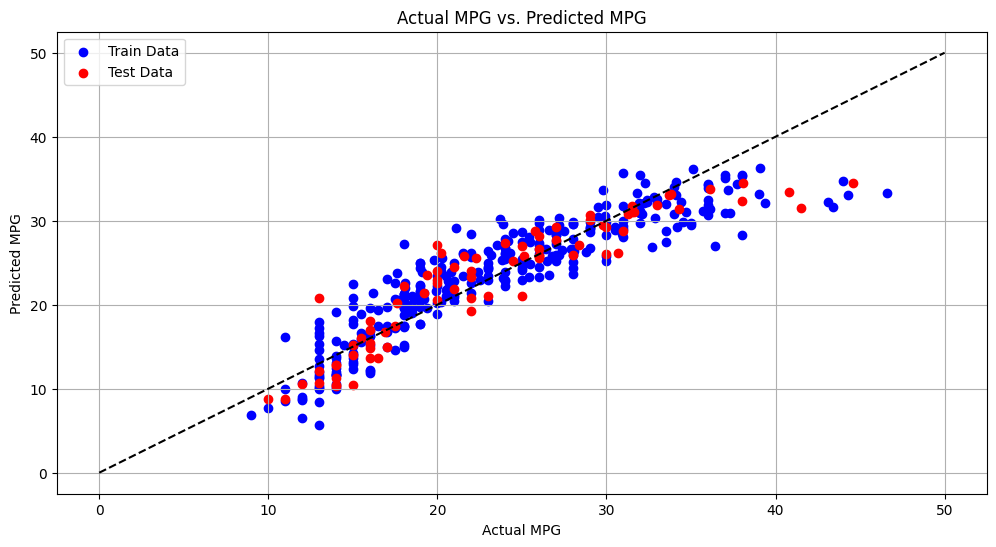

In [150]:
import matplotlib.pyplot as plt

# Plotting the actual MPG vs. predicted MPG for both train and test data
plt.figure(figsize=(12, 6))

# Plotting train data
plt.scatter(y_train, linear_model.predict(X_train), color='blue', label='Train Data')

# Plotting test data
plt.scatter(y_test, predictions, color='red', label='Test Data')

# Plotting the diagonal line
plt.plot([0, 50], [0, 50], color='black', linestyle='--')

plt.title('Actual MPG vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.grid(True)
plt.show()


In [151]:
#Question 3:
# Reduce the number of features in our linear regression example to two (you may pick any two).
# What happens to the prediction of the first row of data (which was previously 13.256?

In [152]:
# code that addresses Question 3

In [153]:
#Answer 3:
#

In [154]:
#Question 4:
# Instead of predicting MPG, predict Horsepower.
# What is the prediction compared to the real value of the first elment of the test set?


In [155]:
# code that addresses Question 4

In [156]:
#Answer 4:
#

In [164]:
# Select two features: Displacement and Weight
selected_features = ['Displacement', 'Weight']

# Split the dataset into features and labels
X = dataset[selected_features]
y = dataset['Horsepower']  # Change target variable to 'Horsepower'

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict using the test set
predictions = linear_model.predict(X_test)

# Print the prediction of the first row of test data
first_test_prediction = predictions[0]
print("Prediction of the first row of test data:", first_test_prediction)


Prediction of the first row of test data: 69.82924822932519


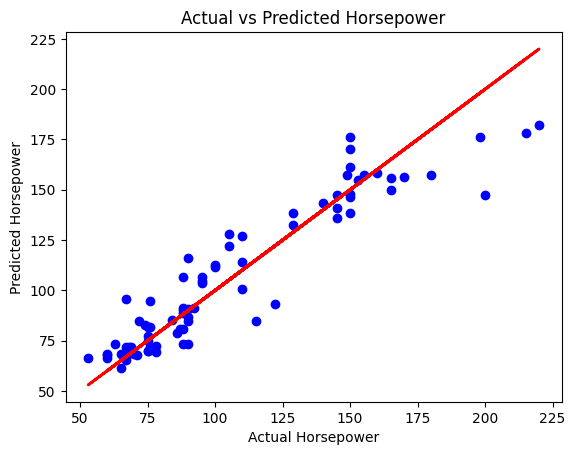

In [165]:
# Plotting the predicted vs actual Horsepower
plt.scatter(y_test, predictions, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)  # Plotting the y=x line for reference
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.title('Actual vs Predicted Horsepower')
plt.show()


In [166]:
# Select features and target
X = dataset.drop('MPG', axis=1)  # Features
y = dataset['Horsepower']  # Target variable is now 'Horsepower'

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict the first element of the test set
first_test_row = X_test.iloc[[0]]
prediction = linear_model.predict(first_test_row)

# Print the prediction compared to the actual value
actual_value = y_test.iloc[0]
print("Predicted Horsepower:", prediction)
print("Actual Horsepower:", actual_value)


Predicted Horsepower: [75.]
Actual Horsepower: 75.0


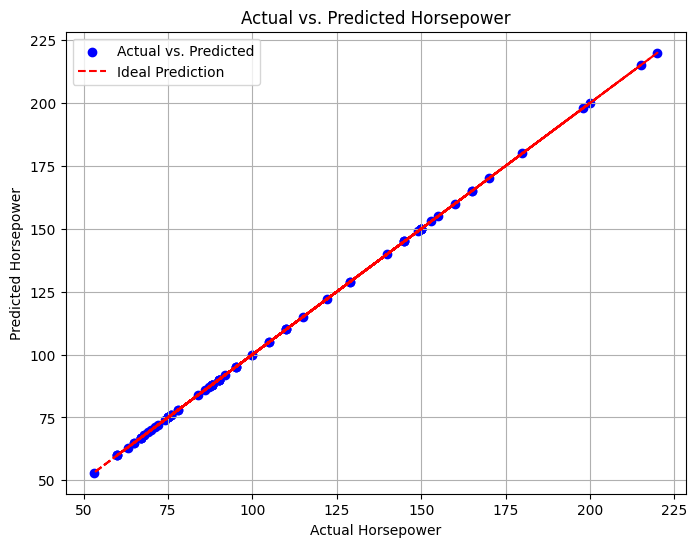

In [167]:
# Predict 'Horsepower' for the test set
predictions = linear_model.predict(X_test)

# Create a DataFrame to store the actual and predicted 'Horsepower'
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

# Plot the actual vs. predicted 'Horsepower'
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Ideal Prediction')
plt.title('Actual vs. Predicted Horsepower')
plt.xlabel('Actual Horsepower')
plt.ylabel('Predicted Horsepower')
plt.legend()
plt.grid(True)
plt.show()


In [159]:
#Question 5:
# Remove the normalization and use the prediction code as normal. Does our model work better or worse? Why?


In [160]:
# code that addresses Question 5

In [161]:
#Answer 5:
#

Removing normalization from our model could potentially lead to worse performance. Normalization helps to scale features to a similar range, preventing one feature from dominating the others during model training. Without normalization, features with larger scales might have a disproportionate influence on the model's predictions, leading to biased results. Additionally, normalization can aid in the convergence of optimization algorithms, improving the overall stability and performance of the model. Therefore, I believe that our model might work worse without normalization, as it could struggle to generalize well to new data and make accurate predictions.

In [168]:
# Select features and target
X = dataset.drop('Horsepower', axis=1)  # Features
y = dataset['Horsepower']  # Target variable

# Split the dataset into 20% train and 80% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict using the test set
predictions = linear_model.predict(X_test)

# Print the prediction of the first row of test data
first_test_prediction = predictions[0]
print("Prediction of the first row of test data:", first_test_prediction)


Prediction of the first row of test data: 75.6852377518957


In [162]:


# Select two features: Displacement and Weight
selected_features = ['Displacement', 'Weight']

# Split the dataset into features and labels
X = dataset[selected_features]
y = dataset['MPG']

# Split the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the linear regression model
linear_model = LinearRegression().fit(X_train, y_train)

# Predict using the test set
predictions = linear_model.predict(X_test)

# Print the prediction of the first row of test data
first_test_prediction = predictions[0]
print("Prediction of the first row of test data:", first_test_prediction)

Prediction of the first row of test data: 30.10602397802105


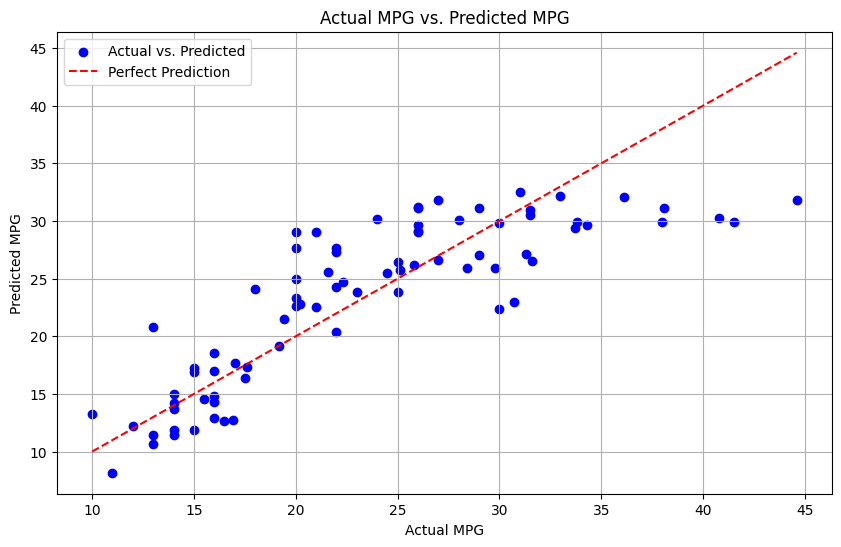

In [163]:
import matplotlib.pyplot as plt

# Plot actual MPG vs. predicted MPG
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual MPG vs. Predicted MPG')
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.legend()
plt.grid(True)
plt.show()
